# NYC Bus Breakdown Analysis and Dashboard

## by Justin Sierchio

In this analysis, we will be looking at bus breakdowns in New York City as well as creating a dashboard. We would like to be able to gain insights from this data as well.

This data is in .csv and .json file format and is from Kaggle at: https://www.kaggle.com/new-york-city/ny-bus-breakdown-and-delays/download. More information related to the dataset can be found at: https://www.kaggle.com/new-york-city/ny-bus-breakdown-and-delays.

## Notebook Initialization

In [1]:
# Import Relevant Libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

print('Initial libraries loaded into workspace!')

Initial libraries loaded into workspace!


In [2]:
# Upload Datasets for Study
df_NYCBus = pd.read_csv("bus-breakdown-and-delays.csv");
df_NYCBusMeta = pd.read_json('socrata_metadata.json', lines=True)

print('Datasets uploaded!');

Datasets uploaded!


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# Display 1st 5 rows from NYC Bus dataset
df_NYCBus.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1227538,Special Ed AM Run,2621,J711,Heavy Traffic,75003,2015-11-05T08:10:00.000,2015-11-05T08:12:00.000,New Jersey,...,NaN,11,Yes,No,Yes,2015-11-05T08:12:00.000,NaN,2015-11-05T08:12:14.000,Running Late,School-Age
1,2015-2016,1227539,Special Ed AM Run,1260,M351,Heavy Traffic,06716,2015-11-05T08:10:00.000,2015-11-05T08:12:00.000,Manhattan,...,20MNS,2,Yes,Yes,No,2015-11-05T08:12:00.000,NaN,2015-11-05T08:13:34.000,Running Late,School-Age
2,2015-2016,1227540,Pre-K/EI,418,3,Heavy Traffic,C445,2015-11-05T08:09:00.000,2015-11-05T08:13:00.000,Bronx,...,15MIN,8,Yes,Yes,Yes,2015-11-05T08:13:00.000,NaN,2015-11-05T08:13:22.000,Running Late,Pre-K
3,2015-2016,1227541,Special Ed AM Run,4522,M271,Heavy Traffic,02699,2015-11-05T08:12:00.000,2015-11-05T08:14:00.000,Manhattan,...,15 MIN,6,No,No,No,2015-11-05T08:14:00.000,NaN,2015-11-05T08:14:04.000,Running Late,School-Age
4,2015-2016,1227542,Special Ed AM Run,3124,M373,Heavy Traffic,02116,2015-11-05T08:13:00.000,2015-11-05T08:14:00.000,Manhattan,...,NaN,6,No,No,No,2015-11-05T08:14:00.000,NaN,2015-11-05T08:14:08.000,Running Late,School-Age


In [4]:
# Display 1st 5 rows from NYC Bus Meta dataset
df_NYCBusMeta.head()

,downloadCount,query,viewLastModified,displayType,category,rowsUpdatedAt,description,viewType,totalTimesRated,name,...,flags,provenance,rowsUpdatedBy,owner,viewCount,approvals,averageRating,publicationGroup,id,hideFromCatalog
0,5368,{},1556893261,table,Transportation,1575114040,The Bus Breakdown and Delay system collects in...,tabular,0,Bus Breakdown and Delays,...,"[default, restorable, restorePossibleForType]",official,5fuc-pqz2,{'profileImageUrlSmall': '/api/users/5fuc-pqz2...,10105,[{'submissionObject': 'public_audience_request...,0,4528409,ez4e-fazm,False


## Data Cleaning

To begin, et us see how large this dataset is.

In [5]:
# Find the shape of the dataset
df_NYCBus.shape

(379412, 21)

Let's find the status of our data and finding out how many 'NaN' or 'null' values we have.

In [6]:
# Display number of 'NaN' or 'null' values exist in the dataset
df_NYCBus.isnull().sum()

School_Year                             0
Busbreakdown_ID                         0
Run_Type                                3
Bus_No                                 10
Route_Number                            7
Reason                                  2
Schools_Serviced                        7
Occurred_On                             0
Created_On                              0
Boro                                11095
Bus_Company_Name                        0
How_Long_Delayed                    43138
Number_Of_Students_On_The_Bus           0
Has_Contractor_Notified_Schools         0
Has_Contractor_Notified_Parents         0
Have_You_Alerted_OPT                    0
Informed_On                             0
Incident_Number                    369387
Last_Updated_On                         0
Breakdown_or_Running_Late               0
School_Age_or_PreK                      0
dtype: int64

We see that the incident number is largely nonexistant, and there are significant numbers of 'How_Long_Delayed' and 'Boro.' For the purposes of this analysis and constructing a dashboard, let's remove Incident_Number and How_Long_Delayed, followed by removing all the remaining 'Nan' and 'null' values.

In [7]:
# Drop 'Incident_Number', 'How_Long_Delayed'
df_NYCBus1 = df_NYCBus.drop(['Incident_Number', 'How_Long_Delayed'], axis = 1)
df_NYCBus1.reset_index(drop=True,  inplace=True)

In [8]:
# Remove 'NaN' and 'null' values
df_NYCBus2 = df_NYCBus1.dropna();
df_NYCBus2.reset_index(drop=True,  inplace=True)

# Display# Display number of 'NaN' or 'null' values exist in the modified dataset
df_NYCBus2.isnull().sum()

School_Year                        0
Busbreakdown_ID                    0
Run_Type                           0
Bus_No                             0
Route_Number                       0
Reason                             0
Schools_Serviced                   0
Occurred_On                        0
Created_On                         0
Boro                               0
Bus_Company_Name                   0
Number_Of_Students_On_The_Bus      0
Has_Contractor_Notified_Schools    0
Has_Contractor_Notified_Parents    0
Have_You_Alerted_OPT               0
Informed_On                        0
Last_Updated_On                    0
Breakdown_or_Running_Late          0
School_Age_or_PreK                 0
dtype: int64

Now it has appeared that we have removed all the unknown values. For our exploratory analysis and dashboard, the dataset is sufficiently cleaned.

## Exploratory Data Analysis

Let's explore a couple this dataset in a few basic ways. To begin, let's look at the reasons for the bus breakdowns.

Text(0.5, 0, 'Reason')

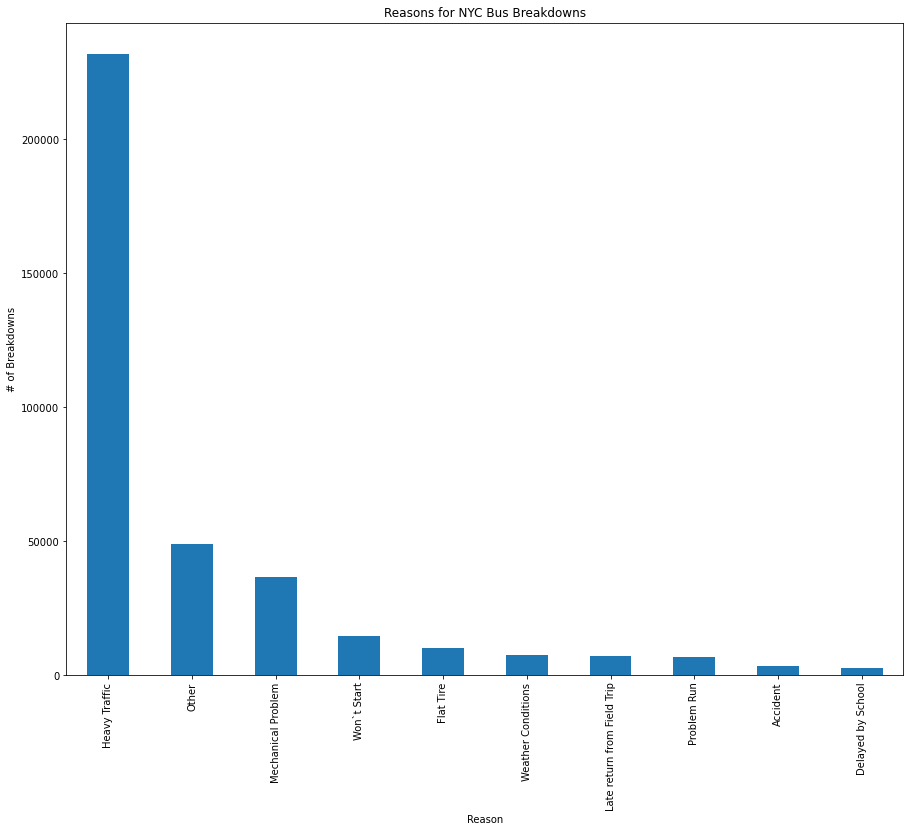

In [9]:
# Determine Reasons for Bus Breakdowns
plt.figure(figsize=(15,12))
df_NYCBus2['Reason'].value_counts()[:20].plot(kind='bar')
plt.title('Reasons for NYC Bus Breakdowns')
plt.ylabel('# of Breakdowns')
plt.xlabel('Reason')

As we can see, heavy traffic is cited as the most common reason for bus breakdowns. Let's compare this reason against the column 'breakdowns or running late.'

Text(0.5, 0, 'Reason')

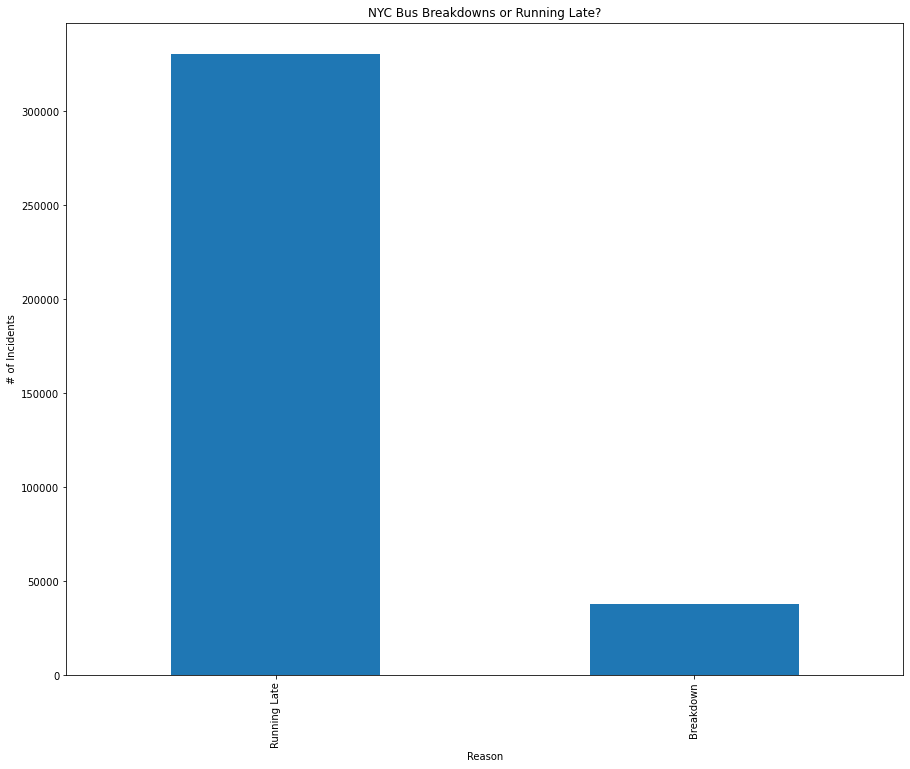

In [10]:
# Breakdowns vs. Running Late
plt.figure(figsize=(15,12))
df_NYCBus2['Breakdown_or_Running_Late'].value_counts()[:20].plot(kind='bar')
plt.title('NYC Bus Breakdowns or Running Late?')
plt.ylabel('# of Incidents')
plt.xlabel('Reason')

Approximately 90% of the bus 'breakdowns' are actually buses running late due to heavy traffic. Now let's take a look where the bus delays occur.

Text(0.5, 0, 'Borough')

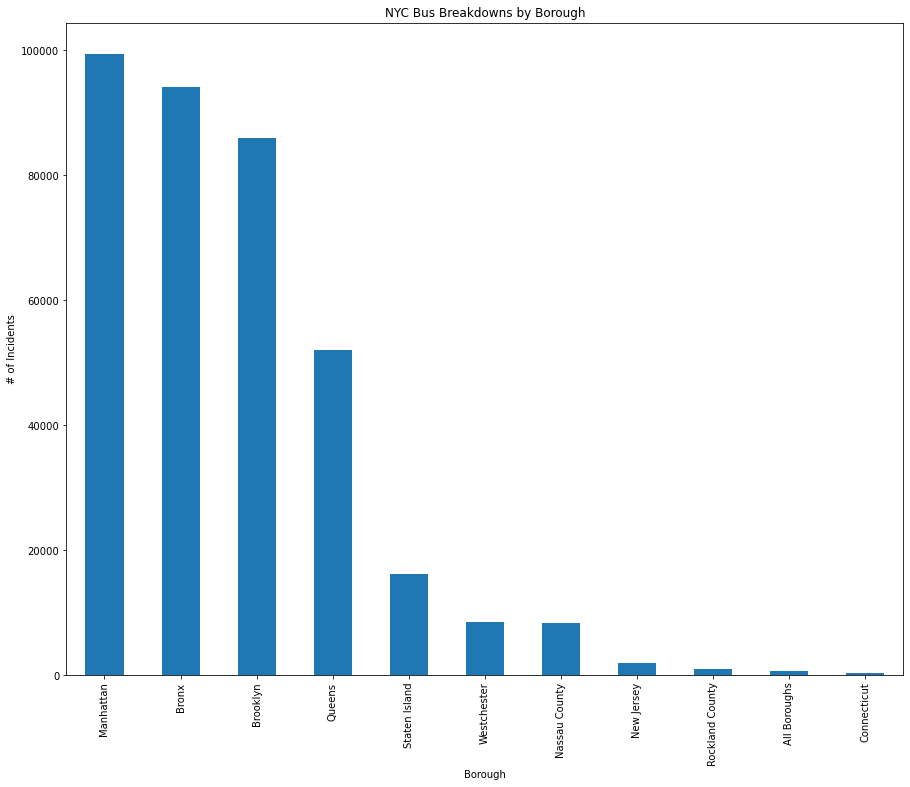

In [11]:
# Determine which boroughs have delays/breakdowns
plt.figure(figsize=(15,12))
df_NYCBus2['Boro'].value_counts()[:20].plot(kind='bar')
plt.title('NYC Bus Breakdowns by Borough')
plt.ylabel('# of Incidents')
plt.xlabel('Borough')

According to the plot, the most incidents occur in Manhattan, Bronx and Brooklyn. This observation tracks very well with population density.

[https://www.census.gov/quickfacts/fact/table/newyorkcitynewyork,bronxcountybronxboroughnewyork,kingscountybrooklynboroughnewyork,newyorkcountymanhattanboroughnewyork,queenscountyqueensboroughnewyork,richmondcountystatenislandboroughnewyork/PST045219]

Let's see if there is a correlation with the number of students on the bus and the number of incidents.

Text(0.5, 0, '# of Students on Bus')

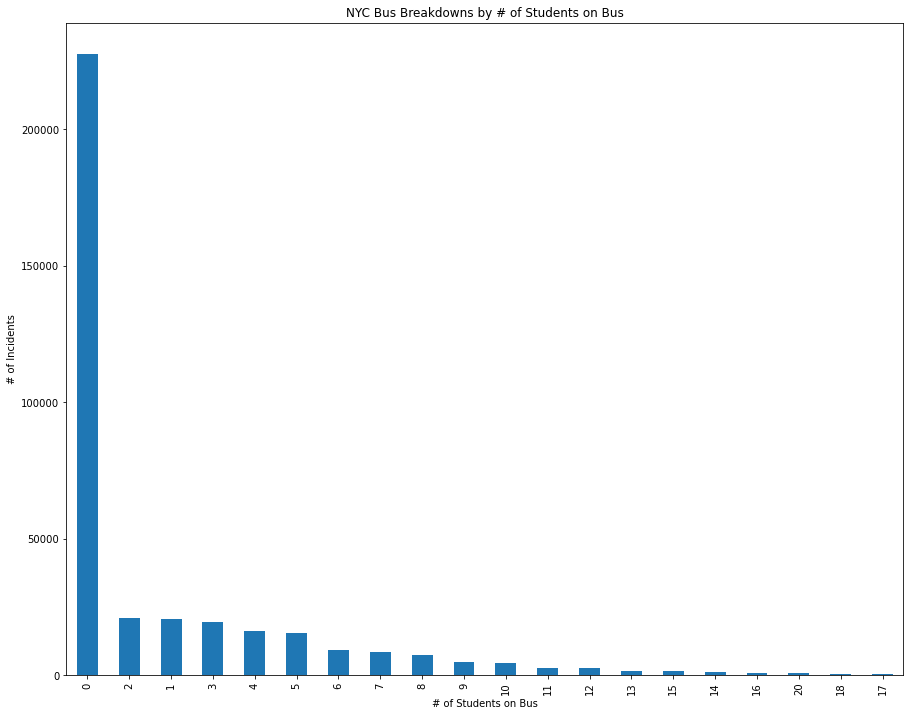

In [13]:
# Determine which boroughs have delays/breakdowns
plt.figure(figsize=(15,12))
df_NYCBus2['Number_Of_Students_On_The_Bus'].value_counts()[:20].plot(kind='bar')
plt.title('NYC Bus Breakdowns by # of Students on Bus')
plt.ylabel('# of Incidents')
plt.xlabel('# of Students on Bus')

The vast majority of incidents occur with no students actually on the bus. Possible reasons for this observation include (a) delays in reaching students waiting to be picked up for school (b) delays in dropping them off possibly during rush hour and (c) delays in reaching their final destinations for the evening (again possibly during rush hour).

To round out this part of our project, let's see if the contractor is notifying both the parents and the schools.

Text(0.5, 0, 'Notifications: Yes or No?')

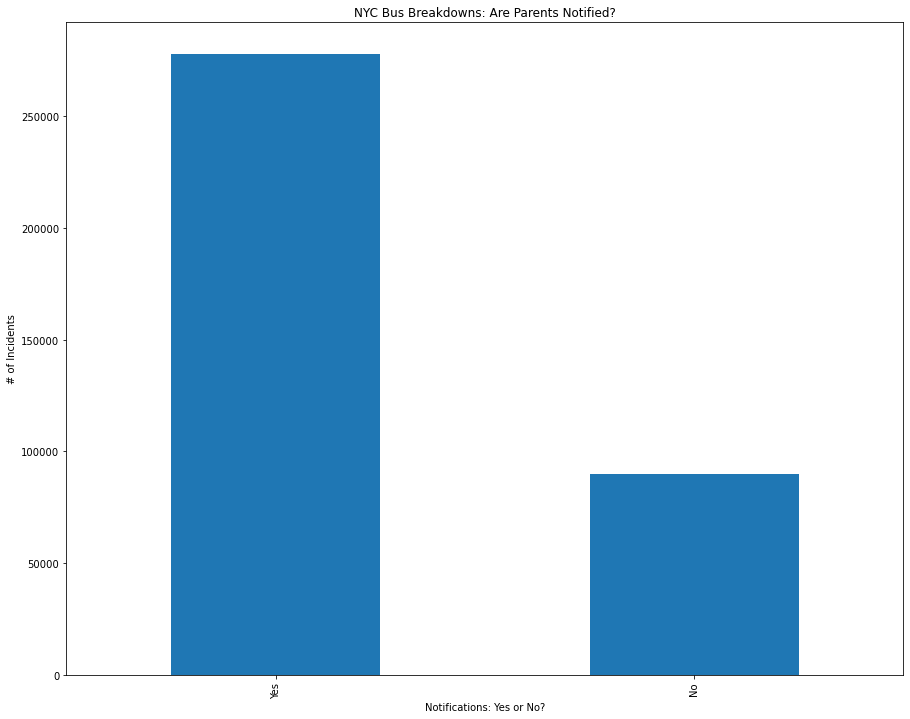

In [14]:
# Are Parents notified of a delay?
plt.figure(figsize=(15,12))
df_NYCBus2['Has_Contractor_Notified_Parents'].value_counts()[:20].plot(kind='bar')
plt.title('NYC Bus Breakdowns: Are Parents Notified?')
plt.ylabel('# of Incidents')
plt.xlabel('Notifications: Yes or No?')

In roughly 1/4 of the cases, the parents are not notified of delays. What about the schools?

Text(0.5, 0, 'Notifications: Yes or No?')

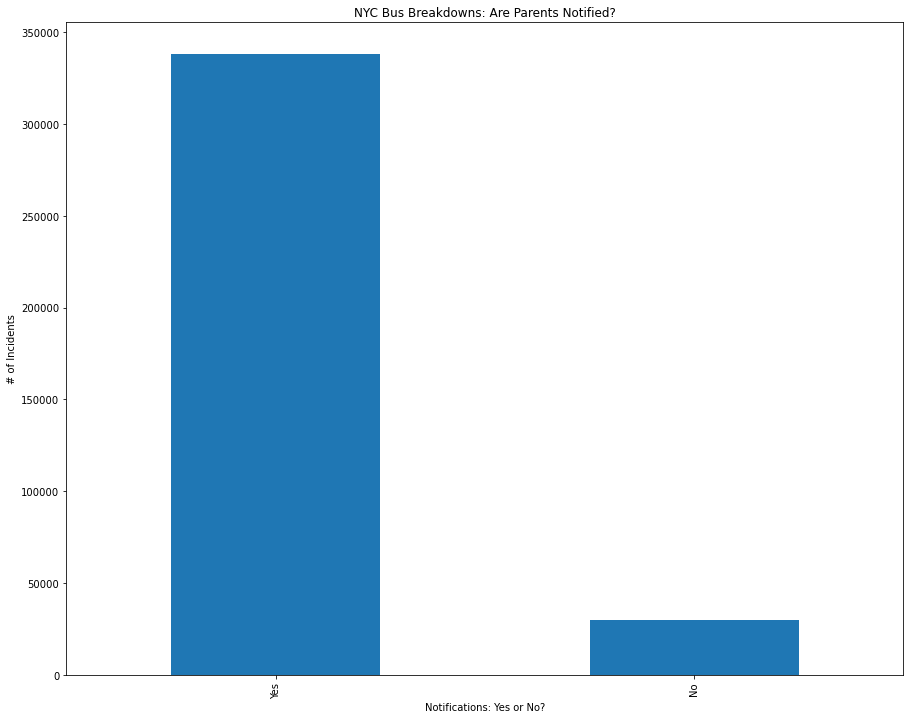

In [15]:
# Are Schools notified of a delay?
plt.figure(figsize=(15,12))
df_NYCBus2['Has_Contractor_Notified_Schools'].value_counts()[:20].plot(kind='bar')
plt.title('NYC Bus Breakdowns: Are Parents Notified?')
plt.ylabel('# of Incidents')
plt.xlabel('Notifications: Yes or No?')

In the case of the schools, the vast majority (>90%) appear to be notified.